In [23]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
#allows to print the dataframe nicely
from IPython.core import display as ICD
# !pip install plotly
# import plotly.plotly as py
# from plotly.graph_objs import *
# import plotly.tools as tls
# from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# import additional packages to insepct data and clean them
import pandas as pd
import os 
import random 
from zipfile import ZipFile
import datetime

In [25]:
# import helping functions from the implementation file
#from proj1_helpers import load_csv_data
from proj1_helpers import *
import implementations
from additional_implementations import *

In [26]:
# import zipped files from the github repository
data_folder='./data/'
zip_file = ZipFile(data_folder+'all.zip')
# zip file creates a list of files with certain properties
zip_file.infolist()

[<ZipInfo filename='train.csv' compress_type=deflate file_size=48103379 compress_size=17670847>,
 <ZipInfo filename='test.csv' compress_type=deflate file_size=109335584 compress_size=40089137>,
 <ZipInfo filename='sample-submission.csv' compress_type=deflate file_size=5682394 compress_size=1263762>]

In [27]:
# now we want to access the 'filename' property in the zipfile variable
# and we create a dictionary of dataframe
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
df_train=dfs['train.csv']
df_test=dfs['test.csv']
df_sample_submission=dfs['sample-submission.csv']

In [28]:
df_train_selection=df_train.drop(columns=['Prediction', 'Id'])

In [29]:
counts={}
for column_name in df_train_selection.columns.values:
    
    check=df_train_selection[column_name]==-999.0
    counts[column_name]=np.sum(check.astype('int'))
counts

{'DER_mass_MMC': 38114,
 'DER_mass_transverse_met_lep': 0,
 'DER_mass_vis': 0,
 'DER_pt_h': 0,
 'DER_deltaeta_jet_jet': 177457,
 'DER_mass_jet_jet': 177457,
 'DER_prodeta_jet_jet': 177457,
 'DER_deltar_tau_lep': 0,
 'DER_pt_tot': 0,
 'DER_sum_pt': 0,
 'DER_pt_ratio_lep_tau': 0,
 'DER_met_phi_centrality': 0,
 'DER_lep_eta_centrality': 177457,
 'PRI_tau_pt': 0,
 'PRI_tau_eta': 0,
 'PRI_tau_phi': 0,
 'PRI_lep_pt': 0,
 'PRI_lep_eta': 0,
 'PRI_lep_phi': 0,
 'PRI_met': 0,
 'PRI_met_phi': 0,
 'PRI_met_sumet': 0,
 'PRI_jet_num': 0,
 'PRI_jet_leading_pt': 99913,
 'PRI_jet_leading_eta': 99913,
 'PRI_jet_leading_phi': 99913,
 'PRI_jet_subleading_pt': 177457,
 'PRI_jet_subleading_eta': 177457,
 'PRI_jet_subleading_phi': 177457,
 'PRI_jet_all_pt': 0}

In [30]:
df_train_selection=df_train_selection.drop(columns=['PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'DER_lep_eta_centrality', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi'])

In [31]:
df_train_selection=df_train_selection.drop(columns=['PRI_jet_all_pt', 'DER_sum_pt', 'PRI_met_sumet', 'DER_pt_h'])

In [32]:
counts={}
for column_name in df_train_selection.columns.values:
    
    check=df_train_selection[column_name]==-999.0
    counts[column_name]=np.sum(check.astype('int'))
counts

{'DER_mass_MMC': 38114,
 'DER_mass_transverse_met_lep': 0,
 'DER_mass_vis': 0,
 'DER_deltar_tau_lep': 0,
 'DER_pt_tot': 0,
 'DER_pt_ratio_lep_tau': 0,
 'DER_met_phi_centrality': 0,
 'PRI_tau_pt': 0,
 'PRI_tau_eta': 0,
 'PRI_tau_phi': 0,
 'PRI_lep_pt': 0,
 'PRI_lep_eta': 0,
 'PRI_lep_phi': 0,
 'PRI_met': 0,
 'PRI_met_phi': 0,
 'PRI_jet_num': 0}

In [33]:
median=np.median(df_train_selection['DER_mass_MMC'])
#df_train_selection['DER_mass_MMC'][df_train_selection['DER_mass_MMC']==-999.0]=median
df_train_selection=df_train_selection.replace({'DER_mass_MMC': {-999.0: median}})

In [12]:
y_train_selection=np.array(df_train['Prediction'])
y_train_selection[np.where(y_train_selection=='b')] = -1.
y_train_selection[np.where(y_train_selection=='s')] = 1.
y_train_selection=y_train_selection.astype('float')

In [ ]:
tx_train_selection_polynomial=polynomial_features_simple(df_train_selection, 9)

In [ ]:
w,loss=implementations.least_squares(y_train_selection,tx_train_selection_polynomial)
print('Weigths: ',w,"\n\n",'MSE: ',loss)

## Ridge

In [ ]:
# lambdas=np.logspace(-10,1,15)
# mses=[]
# ws=[]
# for lambda_ in lambdas:
#     w,loss=implementations.ridge_regression(y_train_selection,tx_train_selection_polynomial,lambda_)
#     mses.append(loss)
#     ws.append(w)
# cross_validation_visualization(lambdas, mses, mses)
# w_final=ws[np.argmin(mses)]
# mses[np.argmin(mses)]

In [ ]:
lambdas=np.logspace(-10,-2,25)
degrees=np.linspace(5,15,10).astype('int')
mses= np.zeros((len(degrees), len(lambdas)))

for ind_degree,degree in enumerate(degrees):
    tx_train_selection_polynomial=polynomial_features_simple(df_train_selection, degree)
    for ind_lambda,lambda_ in enumerate(lambdas):
        w,loss=implementations.ridge_regression(y_train_selection,tx_train_selection_polynomial,lambda_)
        mses[ind_degree, ind_lambda]=loss
        
mse_final, degree_final,lambda_final=get_best_parameters(degrees, lambdas, mses)
tx_train_selection_polynomial=polynomial_features_simple(df_train_selection, degree_final)
w_final,loss=implementations.ridge_regression(y_train_selection,tx_train_selection_polynomial,lambda_final)

print('MSE: ',mse_final,'   Degree: ',degree_final,'   Lambda: ',lambda_final)
print('')
print('Ws: ',w_final)

In [ ]:
y_pred=predict_labels(w_final,tx_train_selection_polynomial)
print('Performance: ',list(y_pred*y_train_selection).count(1.)/len(tx_train_selection_polynomial))
print('Degree: ',degree_final)
print('Lambda: ',lambda_final)

## Logistic regression

In [ ]:
y_train_selection=np.array(df_train['Prediction'])
y_train_selection[np.where(y_train_selection=='b')] = 0.
y_train_selection[np.where(y_train_selection=='s')] = 1.
y_train_selection=y_train_selection.astype('float')

In [ ]:
tx_train_selection_polynomial=polynomial_features_simple(df_train_selection, 3)

In [ ]:
gamma = 0.000001
lambda_ = 0.0001
points=7000
tx_train_selection_polynomial=tx_train_selection_polynomial[:points]
y_train_selection=y_train_selection[:points]

initial_w = np.zeros((tx_train_selection_polynomial.shape[1], 1))
max_iters = 10
implementations.reg_logistic_regression(y_train_selection, tx_train_selection_polynomial, lambda_, initial_w, max_iters, gamma, keeptrack=False, log_info=True)

## Optimized ridge cross validation

In [13]:
def cross_validation_ridge_loop(y, tx, lambda_, k_fold, seed=1):
    k_indices=build_k_indices(y, k_fold, seed)
    mse_tr = []
    mse_te = []
    wsi_train_lst=[]
    for k in range(k_fold):
        loss_tr, loss_te,wsi_train=cross_validation_ridge(y, tx, k_indices, k, lambda_)
        mse_tr.append(loss_tr)
        mse_te.append(loss_te)
        wsi_train_lst.append(wsi_train)
    return  np.mean(wsi_train_lst, axis=0), np.mean(mse_tr), np.mean(mse_te)

In [14]:
lambdas=np.logspace(-10,-2,25)
degrees=np.linspace(5,15,10).astype('int')
k_fold=4
mses= np.zeros((len(degrees), len(lambdas),2))

for ind_degree,degree in enumerate(degrees):
    tx_train_selection_polynomial=polynomial_features_simple(df_train_selection, degree)
    print('Degree under optimization: ',degree)
    for ind_lambda,lambda_ in enumerate(lambdas):
        w, loss_tr, loss_te = cross_validation_ridge_loop(y_train_selection, tx_train_selection_polynomial, lambda_, k_fold, seed=1)
        mses[ind_degree, ind_lambda][0]=loss_tr
        mses[ind_degree, ind_lambda][1]=loss_te
        
mse_tr_final, degree_final,lambda_final, min_row, min_col=get_best_parameters(degrees, lambdas, mses[:,:,0],return_idx=True)
mse_te_final=mses[min_row,min_col,1]
tx_train_selection_polynomial=polynomial_features_simple(df_train_selection, degree_final)
w_final,loss=implementations.ridge_regression(y_train_selection,tx_train_selection_polynomial,lambda_final)
print('')
print('MSE train: ',mse_tr_final,'   MSE test: ',mse_te_final,'   Degree: ',degree_final,'   Lambda: ',lambda_final)

#print('Ws: ',w_final)

Degree under optimization:  5
Degree under optimization:  6
Degree under optimization:  7
Degree under optimization:  8
Degree under optimization:  9
Degree under optimization:  10
Degree under optimization:  11
Degree under optimization:  12
Degree under optimization:  13
Degree under optimization:  15

MSE train:  0.28748368593301343    MSE test:  2.2584531821554677e+20    Degree:  10    Lambda:  4.641588833612773e-08


Performance:  0.805464
Degree:  10
Lambda:  4.641588833612773e-08


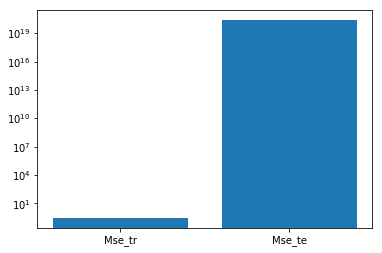

In [15]:
y_pred=predict_labels(w_final,tx_train_selection_polynomial)
print('Learning Performance: ',list(y_pred*y_train_selection).count(1.)/len(tx_train_selection_polynomial))
print('Degree: ',degree_final)
print('Lambda: ',lambda_final)

plt.bar(np.arange(2),[mse_tr_final,mse_te_final], align='center')
plt.yscale('log')
plt.xticks([0,1], ('Mse_tr','Mse_te'))
plt.show()

## Submission preliminary operations

In [16]:
df_test_selection=df_test

In [17]:
df_test_selection=df_test_selection.drop(columns=['Id', 'Prediction'])

In [18]:
df_test_selection=df_test_selection.drop(columns=['PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'DER_lep_eta_centrality', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi'])

In [19]:
df_test_selection=df_test_selection.drop(columns=['PRI_jet_all_pt', 'DER_sum_pt', 'PRI_met_sumet', 'DER_pt_h'])

In [20]:
df_test_selection['DER_mass_MMC'][df_test_selection['DER_mass_MMC']==-999.0]=median

C:\Users\Tullio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
tx_test_selection_polynomial=polynomial_features_simple(df_test_selection, degree_final)

# Submission

In [22]:
tx_test=tx_test_selection_polynomial
y_pred=predict_labels(w_final,tx_test)
create_csv_submission(df_test['Id'], y_pred, 'trial_ridge_polynomial_selection_decisionbest')

### Comparison

In [ ]:
best=pd.read_csv('trial_ridge_polynomial_gau_basic3.csv')
selection=pd.read_csv('trial_ridge_polynomial_selection')

check=selection['Prediction']*best['Prediction']
check.value_counts().plot(kind='bar')

In [ ]:
def standardize_test(x, train_set):
    x=(x-np.mean(train_set,axis=0))/np.std(train_set, axis=0)
    return x
df_test_gau_std=standardize_test(df_test_gau, df_train_gau)